### DLTK ML Clustering Tutorial

In [11]:
# If you are running this notebook on GOOGLE COLAB, uncomment below code & run this cell

# !git clone https://github.com/dltk-ai/qubitai-dltk.git
# %cd qubitai-dltk/examples/machine_learning/
# !pip install qubitai-dltk

In [1]:
# if using source code

import os
os.chdir("../../")

#### Importing Packages

In [2]:
import dltk_ai
from dltk_ai import data_preprocessing
from dltk_ai.dataset_types import Dataset
from getpass import getpass

New version of dltk_ai (1.0.4) available, you are still using older (1.0.3) version of the dltk_ai, Please update using "pip install qubitai-dltk==1.0.4"


#### Data

|Feature | Description|
|:-|:-|
|**CustomerId** | Unique ID assigned to the customer|
|**Gender** | Gender of the customer|
|**Age** | Age of the customer|
|**Annual Income (k$)** | Annual Income of the customer|
|**Spending Score (1-100)**| - Score assigned by the mall based on customer behavior and spending nature|

In [4]:
# read data
df = data_preprocessing.read_data('examples/data/csv/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Initializing DLTK Client

Please check qubitai-dltk documentation on setting up dltk **link**

> <u>Parameters Descriptions</u>
>
> **API key**: `If authentication is enabled`, you need to provide a valid API key
>
> **base_url**: url where kong/base service provided by OpenDLTK is deployed.

In [5]:
api_key = getpass("Valid API key (default=None) : ") or None
base_url = input("Endpoint for openDLTK (default=http://localhost:5000) : ") or "http://localhost:5000"

client = dltk_ai.DltkAiClient(api_key, base_url)

Valid API key (default=None) : ········
Endpoint for openDLTK (default=http://localhost:5000) : https://prod-kong.dltk.ai


<div class="alert alert-block alert-info">
<b>See Also:</b> 

 

1. [How to generate API key](https://docs.dltk.ai/qubitai-dltk/docs/build/html/getting_started/generateAPIkey.html)
2. [OpenDLTK deployment](http://docs.dltk.ai/qubitai-dltk/docs/build/html/getting_started/openDLTK_setup.html)

 

</div>

####  Uploading Data

In [6]:
train_data_store_response = client.store('examples/data/csv/mall_customers.csv', Dataset.TRAIN_DATA)
print(train_data_store_response)
train_data = train_data_store_response['fileUrl']

C:\Users\vivek\anaconda3\envs\dltk_pypi_104\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'prod-kong.dltk.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings



{'id': 269382309559109, 'userId': 6730090969188272963, 'username': None, 'fileUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/Train_Data/1625043745348_mall_customers.csv', 's3Url': None, 'fileSize': 3981, 'fileName': 'mall_customers.csv', 'label': 'Train_Data', 'type': 'FILE', 'isPublic': False, 'cloudfrontUrl': None, 'cloudfrontUrlSigned': None, 's3Key': 'private/6730090969188272963/Train_Data/1625043745348_mall_customers.csv', 'metadata': {'attributes': ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']}, 'fileSystem': 'GCP', 'projectId': 0, 'isDefault': False, 'createdAt': '2021-06-30T09:02:25.731+00:00', 'updatedAt': '2021-06-30T09:02:25.731+00:00'}


#### Model Building

Next step after uploading the dataset is to train a model using Train Dataset.
Please check **link** for supported Libraries/framework for training a model.

For this notebook, we will use 

*  **Library :** Scikit
*  **Algorithm :** AgglomerativeClustering

In [7]:
# Define the task - clustering
task = "clustering"

# algorithm and library to use
algorithm = "AgglomerativeClustering"
library = "scikit"

# features to train the model on
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# number of clusters
num_of_clusters = 5

# training
cluster_response = client.cluster(task, algorithm, train_data, features, library, num_of_clusters,"Clustering_Model")
print(cluster_response)

{'code': 200, 'data': {'jobId': 31412, 'appId': 1612784542341, 'name': 'scikit_clustering_cluster', 'library': 'scikit', 'service': 'Clustering', 'task': 'CLUSTER', 'state': 'RUN', 'startTime': '2021-06-30T09:02:34.175+00:00', 'endTime': None, 'request': {'library': 'scikit', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'config': {'name': 'Clustering_Model', 'algorithm': 'AgglomerativeClustering', 'datasetUrl': '/YOUR_S3_BUCKET/private/6730090969188272963/Train_Data/1625043745348_mall_customers.csv', 'numOfClusters': 5, 'epsilon': 0.1, 'features': ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 'saveModel': 'true', 'params': {}}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None, 'automateJobId': None}}


#### Checking training status</font>

As training a model might take lot of time depending on size of dataset, we can check current status of model training using below functions

In [8]:
# check job_status
cluster_job_status_response = client.job_status(cluster_response['data']['jobId'])
print(cluster_job_status_response)

{'jobId': 31412, 'appId': 1612784542341, 'name': 'scikit_clustering_cluster', 'library': 'scikit', 'service': 'Clustering', 'task': 'CLUSTER', 'state': 'FINISH', 'startTime': '2021-06-30T09:02:34.175+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isJobStopped': None, 'automateJobId': None}


<font color=red>**Note :**</font> Proceed further only after state is **'FINISH'**
    
####  Model Training Job Output </font>

In [9]:
# check job output
cluster_job_output_response = client.job_output(cluster_response['data']['jobId'])
print(cluster_job_output_response['output']['data'].keys())

dict_keys(['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'])


In [10]:
# download the clustered dataset for further analysis
response = client.download(cluster_job_output_response['output']['clusterFileUrl'])

In [11]:
# read the data
from io import StringIO
import pandas as pd
pred_data = StringIO(response.text)

df = pd.read_csv(pred_data, sep=",")

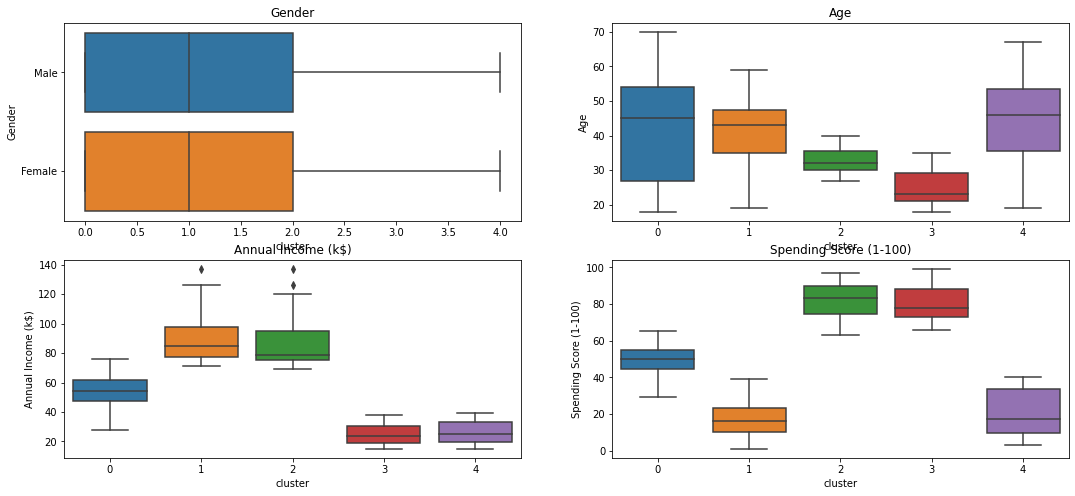

In [12]:
# box plots to check distribution of each variable with respect to the clusters formed
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
ROWS, COLS = 2, 2
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    sns.boxplot(x="cluster",y=feature,data = df,ax=ax[row, col]).set_title(feature)

We can see that Annual Income is the major contributor for the cluster formation. Clusters 1 and 2 have the highest mean annual income. Along with it, Spending Score also contributes

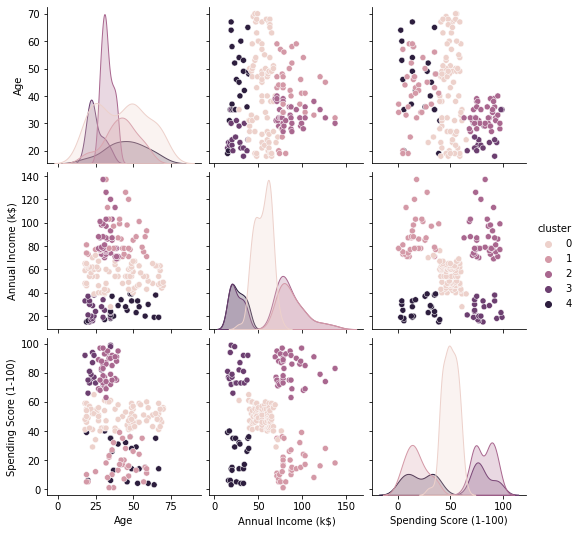

In [13]:
# scatter plot to check ditribution of 2 variables with respect to the clusters formed
sns.pairplot(df, hue="cluster")

The major distinction between clusters is observed for scatter plot between Annual Income and Spending Score. 

#### Reference

For more detail on using ML Clustering please refer [DLTK ML Clustering Documentation](https://docs.dltk.ai/machine_learning/clustering.html)

:
<center><b>For More Details about DLTK</b></center>

|[<img src="https://pbs.twimg.com/profile_images/909757546063323137/-RIWgodF.jpg" width=50 title="Pypi Logo"/>](https://pypi.org/project/qubitai-dltk/) |[<img src="https://cdn.iconscout.com/icon/free/png-512/documentation-1502741-1272951.png" width=50 title="Documentation"/>](https://docs.dltk.ai) | [<img src="https://cdn4.iconfinder.com/data/icons/iconsimple-logotypes/512/github-512.png" width=50 title="Documentation"/>](https://docs.dltk.ai)| 
|:-------------:|:-------:|:--------:|
|pypi|Documentation|Github|